In [34]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np

import seaborn as sns


In [28]:
dir_path = Path.cwd().parent
dir_path

PosixPath('/Users/alexisroberson/Metabolic_Modeling/Project/Scripts_for_ML')

In [4]:
#make list for the directory paths of each shap value result library
paths = []

# make list for the actual shap value result
shap_result = []
number=5
for n in range(1,number+1):
    path = dir_path / f'E_Coli_Randomsplit_shap_data_round_{n}.npy'  #this is the directory to where the shap data is May need to change
    paths.append(path)
    #append the shap data to list
    loaded_data = np.load(path,allow_pickle=True).item()
    shap_result.append(loaded_data)

# Initialize the combined SHAP dictionary with our first result
combined_shap_results = {
    "values": shap_result[0]['shap_values'].values,
    "data": shap_result[0]['shap_values'].data,
    "base_values": shap_result[0]['shap_values'].base_values
}

# Iterate over the the other SHAP results to stack them
for i in range(1, len(shap_result)):
    combined_shap_results["values"] = np.vstack((combined_shap_results["values"], shap_result[i]['shap_values'].values))
    combined_shap_results["data"] = np.vstack((combined_shap_results["data"], shap_result[i]['shap_values'].data))
    combined_shap_results["base_values"] = np.concatenate((combined_shap_results["base_values"], shap_result[i]['shap_values'].base_values))

feature_names = loaded_data['shap_values'].feature_names 
#Plot our results
shap.summary_plot(
    combined_shap_results["values"],  # SHAP values
    combined_shap_results["data"],    # Corresponding feature data
    feature_names=feature_names
)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 131 and the array at index 1 has size 132

In [32]:
path_LORS = dir_path/'Nov5_secondSHapAverRSTest/Light_only_RS_table.csv'
path_LBRS = dir_path/'For_MLClass_BorutaResults/Light_Boruta_Midd_RS_table.csv'

LORS = pd.read_csv(path_LORS,index_col=0)
LORS_df = pd.DataFrame(LORS)
LBRS = pd.read_csv(path_LBRS,index_col=0)
LBRS_df = pd.DataFrame(LBRS)
LORS_df

,1,2,3,4,5,6,7,8,9,10
validation_score,-0.016754,-0.016768,-0.016504,-0.017162,-0.017693,-0.017085,-0.017460,-0.016859,-0.016495,-0.017371
test_score,0.017521,0.016655,0.017252,0.015166,0.017698,0.014901,0.013585,0.017767,0.019879,0.015779
R2,0.281407,0.367509,0.211048,0.220246,0.247891,0.218367,0.337103,0.196900,0.267311,0.314891


In [ ]:
# Extracting validation scores and test scores for both models
LORS_validation_scores = LORS_df.loc['validation_score'].values
LORS_validation_scores = [-score for score in validation_score]
LBRS_validation_scores = LBRS_df.loc['validation_score'].values
LBRS_validtion_scores = [-score for score in random_valid_score]
LORS_test_scores = LORS_df.loc['test_score'].values
LBRS_test_scores = LBRS_df.loc['test_score'].values


# Prepare the data for visualization
data = {
    'Model Type': ['LightGBM'] * len(validation_scores) + ['Random Model'] * len(random_validation_scores),
    'Validation Score': np.concatenate([validation_scores, random_validation_scores]),
    'Test Score': np.concatenate([test_scores, random_test_scores])
}

# Create a DataFrame
scores_df = pd.DataFrame(data)

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a boxplot for Validation Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Model Type', y='Validation Score', data=scores_df)
plt.title('Validation Data Performance')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model Type')

# Create a boxplot for Test Scores
plt.subplot(1, 2, 2)
sns.boxplot(x='Model Type', y='Test Score', data=scores_df)
plt.title('Performance on Testing Data')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model Type')

plt.tight_layout()
plt.show()




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



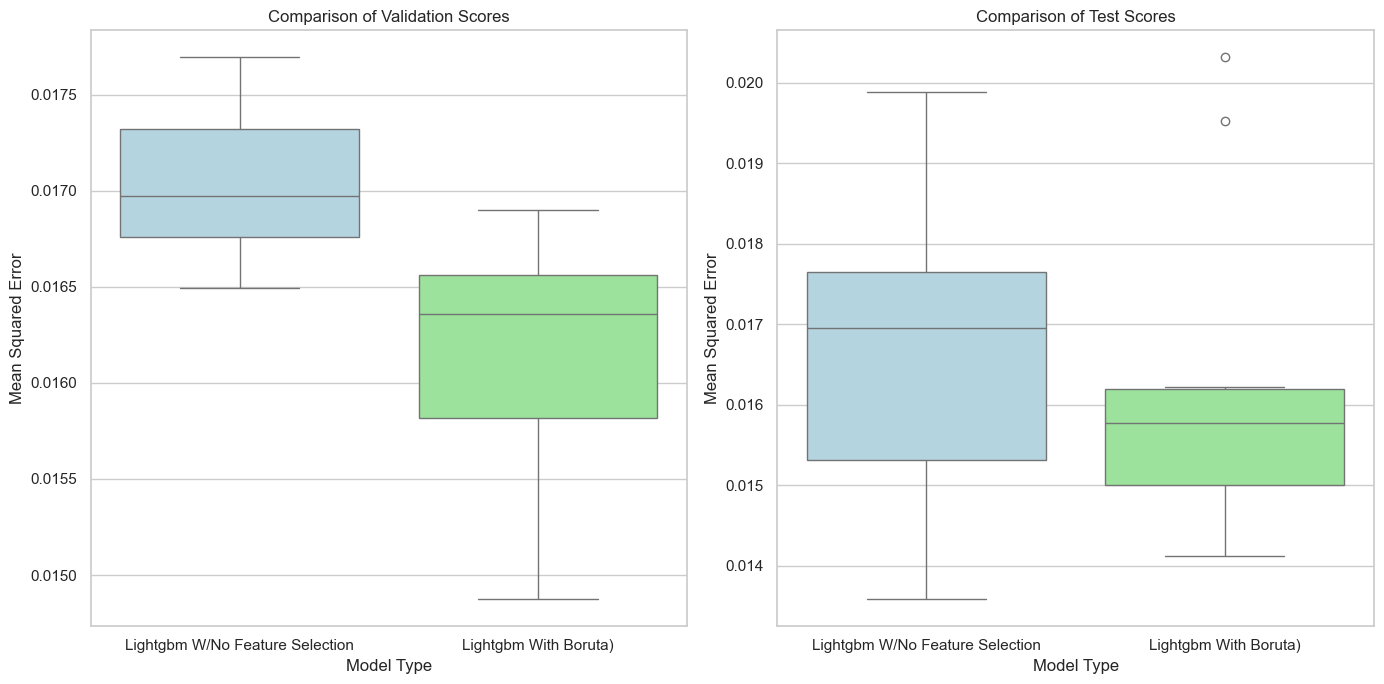

In [36]:
# Extracting validation scores and test scores for both models
LORS_validation_scores = LORS_df.loc['validation_score'].values
LORS_validation_scores = [-score for score in LORS_validation_scores]  # Negating scores (if necessary)
LBRS_validation_scores = LBRS_df.loc['validation_score'].values
LBRS_validation_scores = [-score for score in LBRS_validation_scores]  # Negating scores (if necessary)

LORS_test_scores = LORS_df.loc['test_score'].values
LBRS_test_scores = LBRS_df.loc['test_score'].values

# Prepare the data for visualization
data = {
    'Model Type': ['Lightgbm W/No Feature Selection'] * len(LORS_validation_scores) + ['Lightgbm With Boruta'] * len(LBRS_validation_scores),
    'Validation Score': np.concatenate([LORS_validation_scores, LBRS_validation_scores]),
    'Test Score': np.concatenate([LORS_test_scores, LBRS_test_scores])
}

# Create a DataFrame
scores_df = pd.DataFrame(data)

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure to hold both boxplots
plt.figure(figsize=(14, 7))

# Create a boxplot for Validation Scores
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(x='Model Type', y='Validation Score', data=scores_df,palette=["lightblue", "lightgreen"])
plt.title('Comparison of Validation Scores')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model Type')

# Create a boxplot for Test Scores
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x='Model Type', y='Test Score', data=scores_df,palette=["lightblue", "lightgreen"])
plt.title('Comparison of Test Scores')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model Type')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



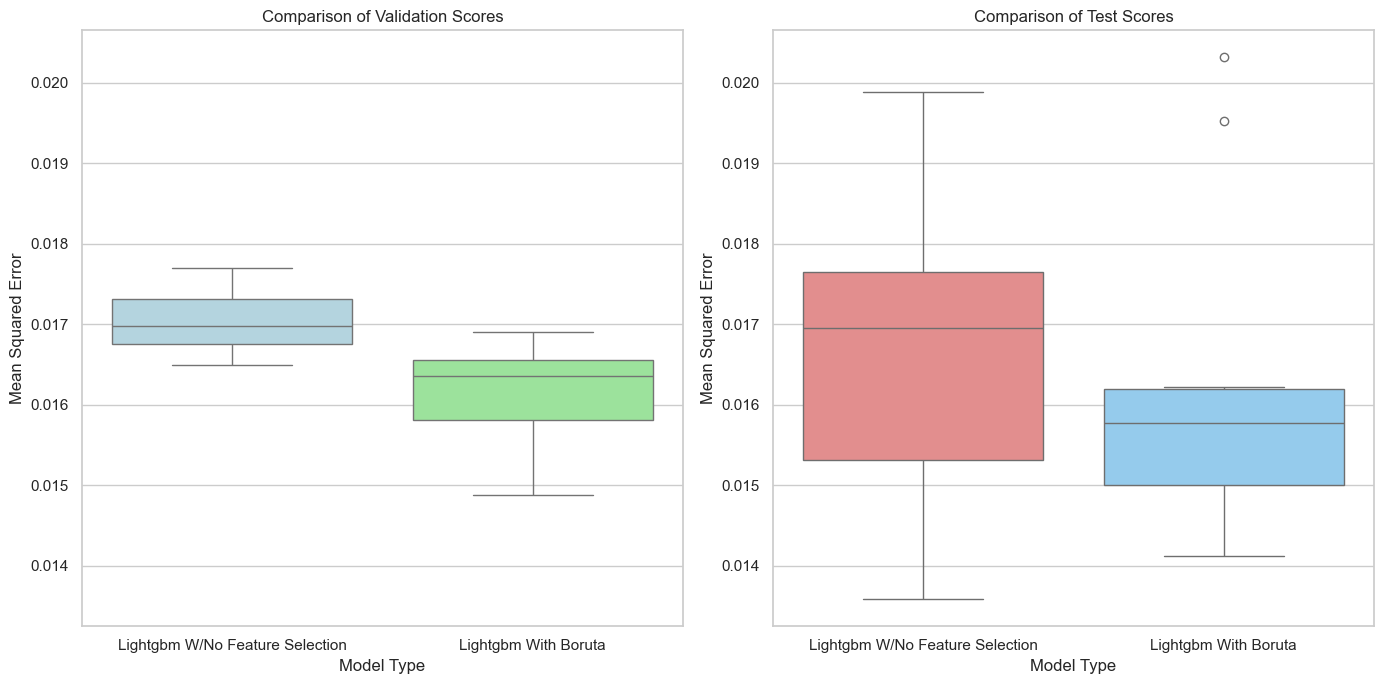

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extracting validation scores and test scores for both models
LORS_validation_scores = LORS_df.loc['validation_score'].values
LORS_validation_scores = [-score for score in LORS_validation_scores]  # Negating scores (if necessary)
LBRS_validation_scores = LBRS_df.loc['validation_score'].values
LBRS_validation_scores = [-score for score in LBRS_validation_scores]  # Negating scores (if necessary)

LORS_test_scores = LORS_df.loc['test_score'].values
LBRS_test_scores = LBRS_df.loc['test_score'].values

# Prepare the data for visualization
data = {
    'Model Type': ['Lightgbm W/No Feature Selection'] * len(LORS_validation_scores) + ['Lightgbm With Boruta'] * len(LBRS_validation_scores),
    'Validation Score': np.concatenate([LORS_validation_scores, LBRS_validation_scores]),
    'Test Score': np.concatenate([LORS_test_scores, LBRS_test_scores])
}

# Create a DataFrame
scores_df = pd.DataFrame(data)

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure to hold both boxplots
plt.figure(figsize=(14, 7))

# Create a boxplot for Validation Scores with custom colors
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(x='Model Type', y='Validation Score', data=scores_df, palette=["lightblue", "lightgreen"])  # Custom colors
plt.title('Comparison of Validation Scores')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model Type')

# Create a boxplot for Test Scores with custom colors
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x='Model Type', y='Test Score', data=scores_df, palette=["lightcoral", "lightskyblue"])  # Custom colors
plt.title('Comparison of Test Scores')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model Type')

# Get the y-axis limits from the first boxplot
ymin, ymax = plt.gca().get_ylim()

# Apply the same y-axis limits to both plots
plt.subplot(1, 2, 1)  # First subplot again
plt.ylim(ymin, ymax)

plt.subplot(1, 2, 2)  # Second subplot
plt.ylim(ymin, ymax)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [42]:
import scipy.stats as stats

# Extracting test scores for both models
LORS_test_scores = LORS_df.loc['test_score'].values
LBRS_test_scores = LBRS_df.loc['test_score'].values

LORS_R_scores = LORS_df.loc['R2'].values
LBRS_R_scores = LBRS_df.loc['R2'].values

# Perform the Mann-Whitney U test
stat, p_value = stats.mannwhitneyu(LORS_R_scores, LBRS_R_scores, alternative='two-sided')

# Output the result
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant difference between the test scores of the two models.")
else:
    print("There is no significant difference between the test scores of the two models.")


U-statistic: 37.0
P-value: 0.3447042220069576
There is no significant difference between the test scores of the two models.
